<a href="https://colab.research.google.com/github/Decadent-tech/CUSTOMER-CHURN-PREDICTION.ipynb/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [11]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Understanding the Data

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* Churn - Customer who have exited from the Org.
* Services Signed up by employees - honeService	,MultipleLines ,    InternetService , OnlineSecurity,	DeviceProtection ,TechSupport	,StreamingTV	,StreamingMovie
*  Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

*  Demographic info about customers – gender, age range, and if they have partners and dependents

In [13]:
df.shape

(7043, 21)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [16]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# Visualizing missing values

<Axes: >

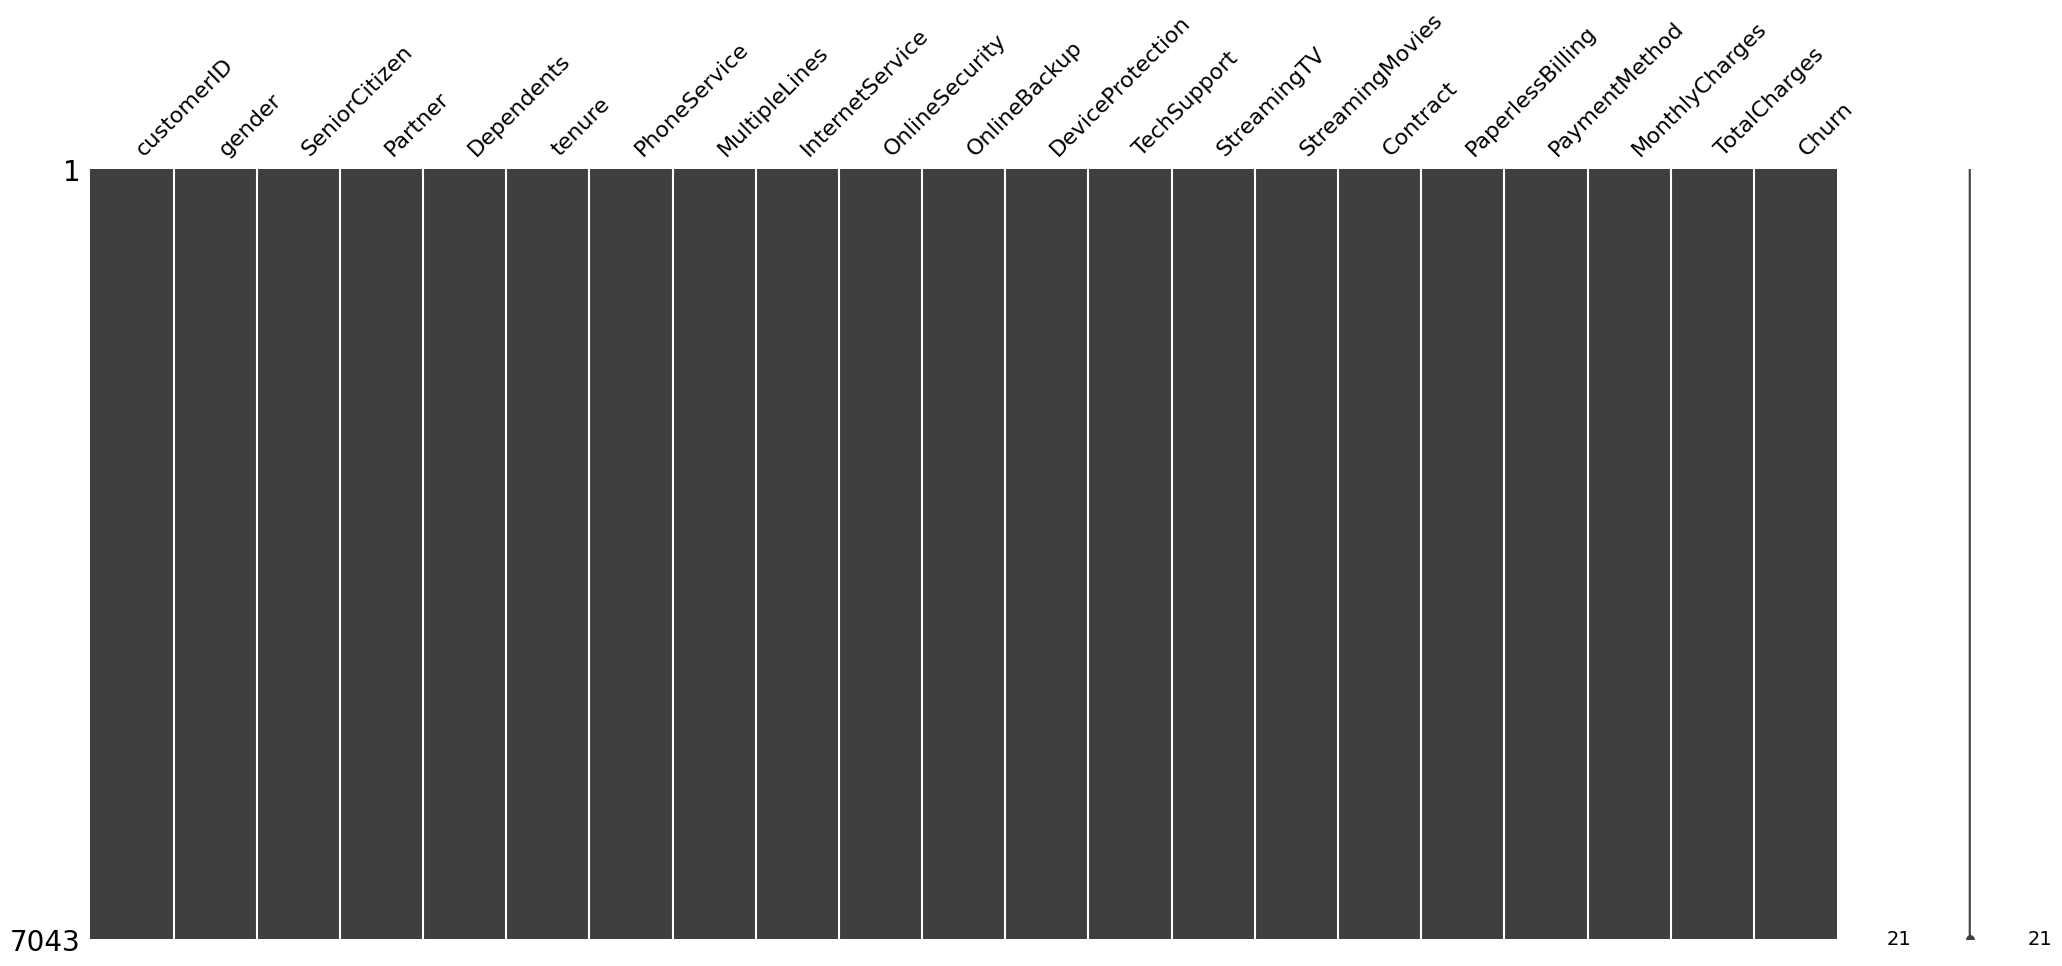

In [17]:
msno.matrix(df)

**From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.**

## Data Manipulation

In [18]:
df = df.drop(['customerID'],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
df['TotalCharges']= pd.to_numeric(df.TotalCharges,errors = 'coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [20]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.**

In [21]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

**There are no additional missing values in the Tenure column**

**Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.**

In [22]:
df.drop(labels=df[df['tenure']==0].index,axis=0,inplace=True)
df[df['tenure']==0].index

Index([], dtype='int64')

**To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values**

In [23]:
df.fillna(df['TotalCharges'].mean(),inplace=True)

In [24]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [25]:
df['SeniorCitizen'].unique()

array([0, 1])

In [26]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0:'No',1:'Yes'})
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [27]:
df['InternetService'].describe(include=['object','bool'])

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [28]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


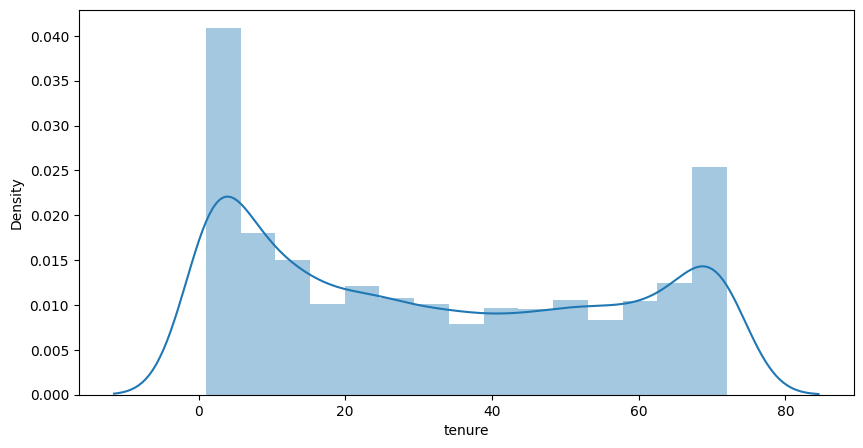

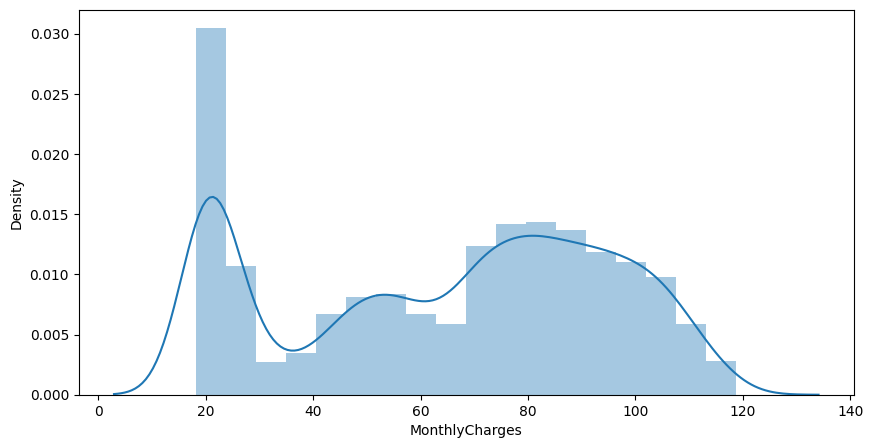

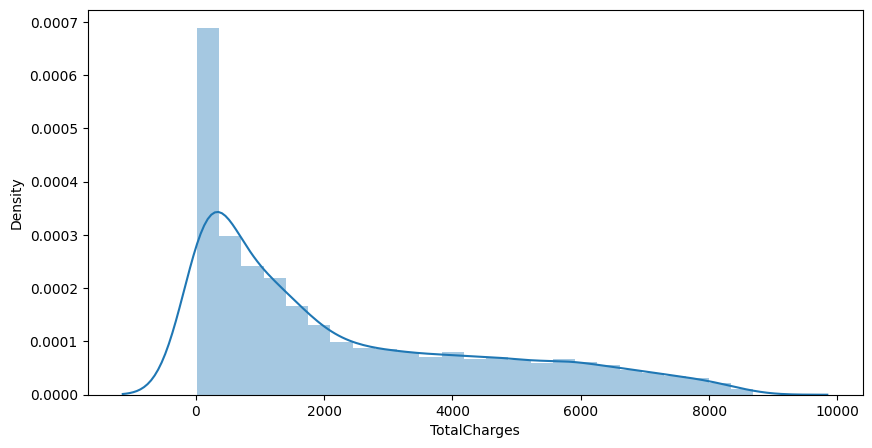

In [29]:
for i in numerical_cols:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.show()

## Visualizations
     ## Gender and Churn Distributions

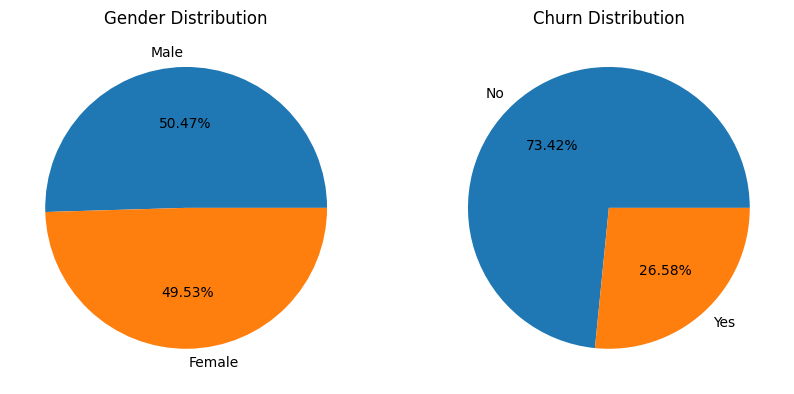

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
ax[0].pie(df['gender'].value_counts(), labels=g_labels, autopct='%.2f%%')
ax[0].set_title('Gender Distribution')
ax[1].pie(df['Churn'].value_counts(), labels=c_labels, autopct='%.2f%%')
ax[1].set_title('Churn Distribution')
plt.show()

*  26.58 % of customers switched to another firm.
*  Customers are 49.5 % female and 50.5 % male

In [31]:
df['Churn'][df['Churn']=="No"].groupby(by=df['gender']).count()

,Churn
gender,
Female,2544
Male,2619


In [32]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

,Churn
gender,
Female,939
Male,930


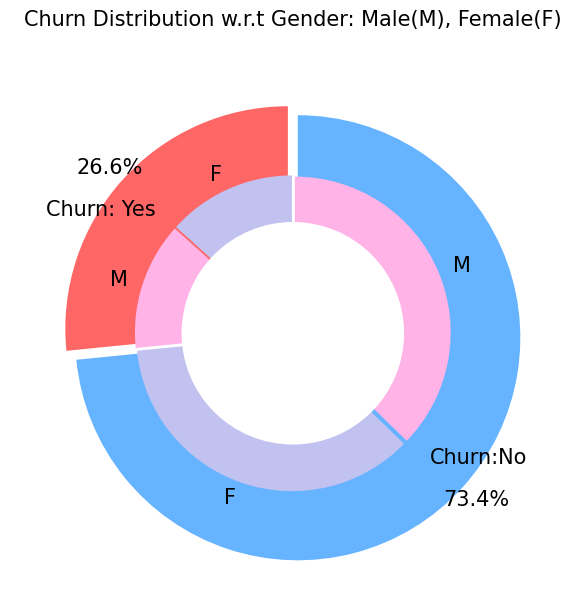

In [33]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [34]:
#sns.countplot(x='Contract',hue='Churn',data=df)
import plotly.express as px

# assuming df has 'Contract' and 'Churn' columns
fig = px.histogram(df,
                   x="Contract",
                   color="Churn",
                   barmode="group",
                   hover_data=df.columns)

fig.update_layout(title="Contract vs Churn",
                  xaxis_title="Contract Type",
                  yaxis_title="Count")

fig.show()


*  About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

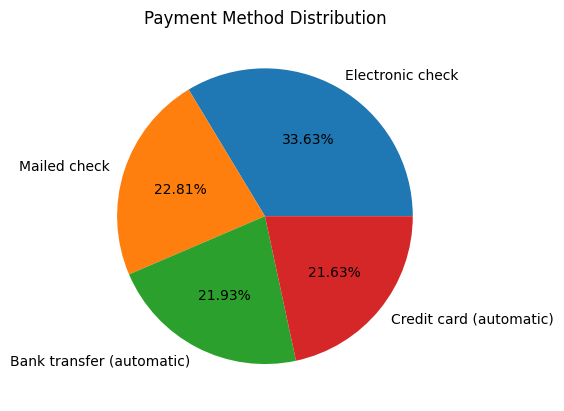

In [35]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Payment Method Distribution')
plt.show()

In [36]:
# assuming df has 'PaymentMethod' and 'Churn' columns
fig = px.histogram(df,
                   x="Churn",
                   color="PaymentMethod",
                   barmode="group",
                   hover_data=df.columns)

fig.update_layout(title="PaymentMethod vs Churn",
                  xaxis_title="Contract Type",
                  yaxis_title="Count")

fig.show()

*  Major customers who moved out were having Electronic Check as Payment Method.
*  Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [37]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [38]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [39]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


**Churn Distribution w.r.t. Internet Service and Gender**

In [40]:
internet_gender_churn = df.groupby(['InternetService', 'gender', 'Churn']).size().reset_index(name='Count')

fig = px.bar(
    internet_gender_churn,
    x="InternetService",
    y="Count",
    color="Churn",
    barmode="group",
    facet_col="gender",
    text="Count",
    title="<b>Churn Distribution w.r.t. Internet Service and Gender</b>"
)

# make text labels visible
fig.update_traces(textposition='outside')

fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [41]:
fig = px.histogram(df,
                   x="Churn",
                   color="Dependents",
                   barmode="group",
                   hover_data=df.columns)

fig.update_layout(title="Dependents vs Churn",
                  xaxis_title="Contract Type",
                  yaxis_title="Count")

fig.show()

**Customers without dependents are more likely to churn**

In [42]:
fig = px.histogram(df,
                   x="Churn",
                   color="Partner",
                   barmode="group",
                   hover_data=df.columns)

fig.update_layout(title="Partner vs Churn",
                  xaxis_title="Contract Type",
                  yaxis_title="Count")

fig.show()

**Customers that doesn't have partners are more likely to churn**

In [45]:
fig = px.histogram(df,
                   x="Churn",
                   color="SeniorCitizen",
                   barmode="group",
                   hover_data=df.columns)

fig.update_layout(title="SeniorCitizen vs Churn",
                  xaxis_title="Contract Type",
                  yaxis_title="Count")

fig.show()

It can be observed that the fraction of senior citizen is very less.
Most of the senior citizens churn.

In [44]:
fig = px.histogram(df,
                   x="Churn",
                   color="OnlineSecurity",
                   barmode="group",
                   hover_data=df.columns)

fig.update_layout(title="OnlineSecurity vs Churn",
                  xaxis_title="Contract Type",
                  yaxis_title="Count")

fig.show()

Most customers churn in the absence of online security,

In [46]:
fig = px.histogram(df,
                   x="Churn",
                   color="PaperlessBilling",
                   barmode="group",
                   hover_data=df.columns)

fig.update_layout(title="PaperlessBilling vs Churn",
                  xaxis_title="Churn",
                  yaxis_title="Count")

fig.show()

Customers with Paperless Billing are most likely to churn.

In [47]:
fig = px.histogram(df,
                   x="Churn",
                   color="TechSupport",
                   barmode="group",
                   hover_data=df.columns)

fig.update_layout(title="TechSupport vs Churn",
                  xaxis_title="Churn",
                  yaxis_title="Count")

fig.show()

Customers with no TechSupport are most likely to migrate to another service provider.

In [48]:
fig = px.histogram(df,
                   x="Churn",
                   color="PhoneService",
                   barmode="group",
                   hover_data=df.columns)

fig.update_layout(title="PhoneService vs Churn",
                  xaxis_title="Churn",
                  yaxis_title="Count")

fig.show()

Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn

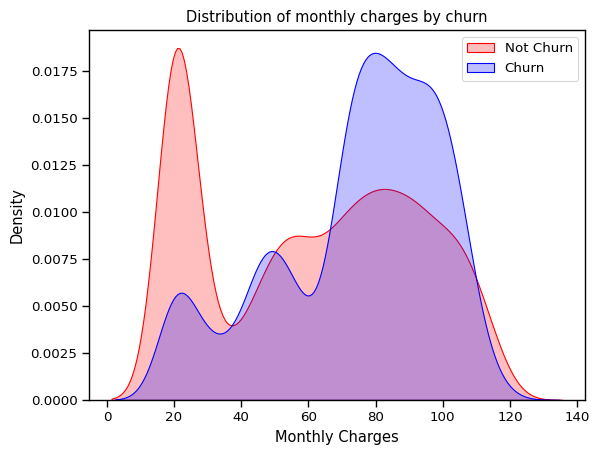

In [49]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with higher Monthly Charges are also more likely to churn

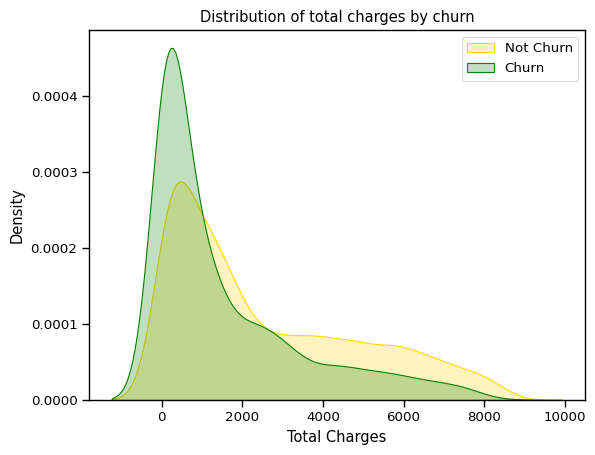

In [50]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

<Axes: xlabel='Churn', ylabel='tenure'>

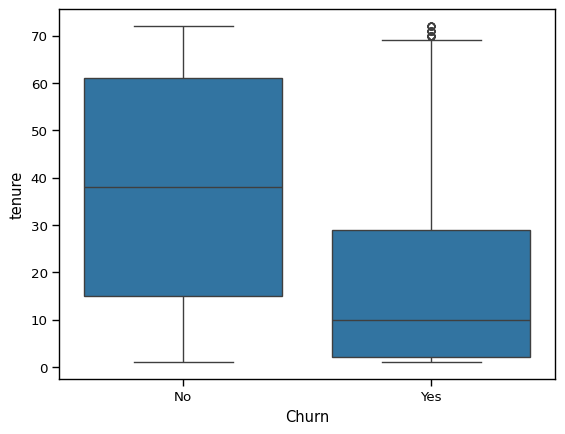

In [52]:
#boxplot
sns.boxplot(x='Churn',y='tenure',data=df)

New customers are more likely to churn

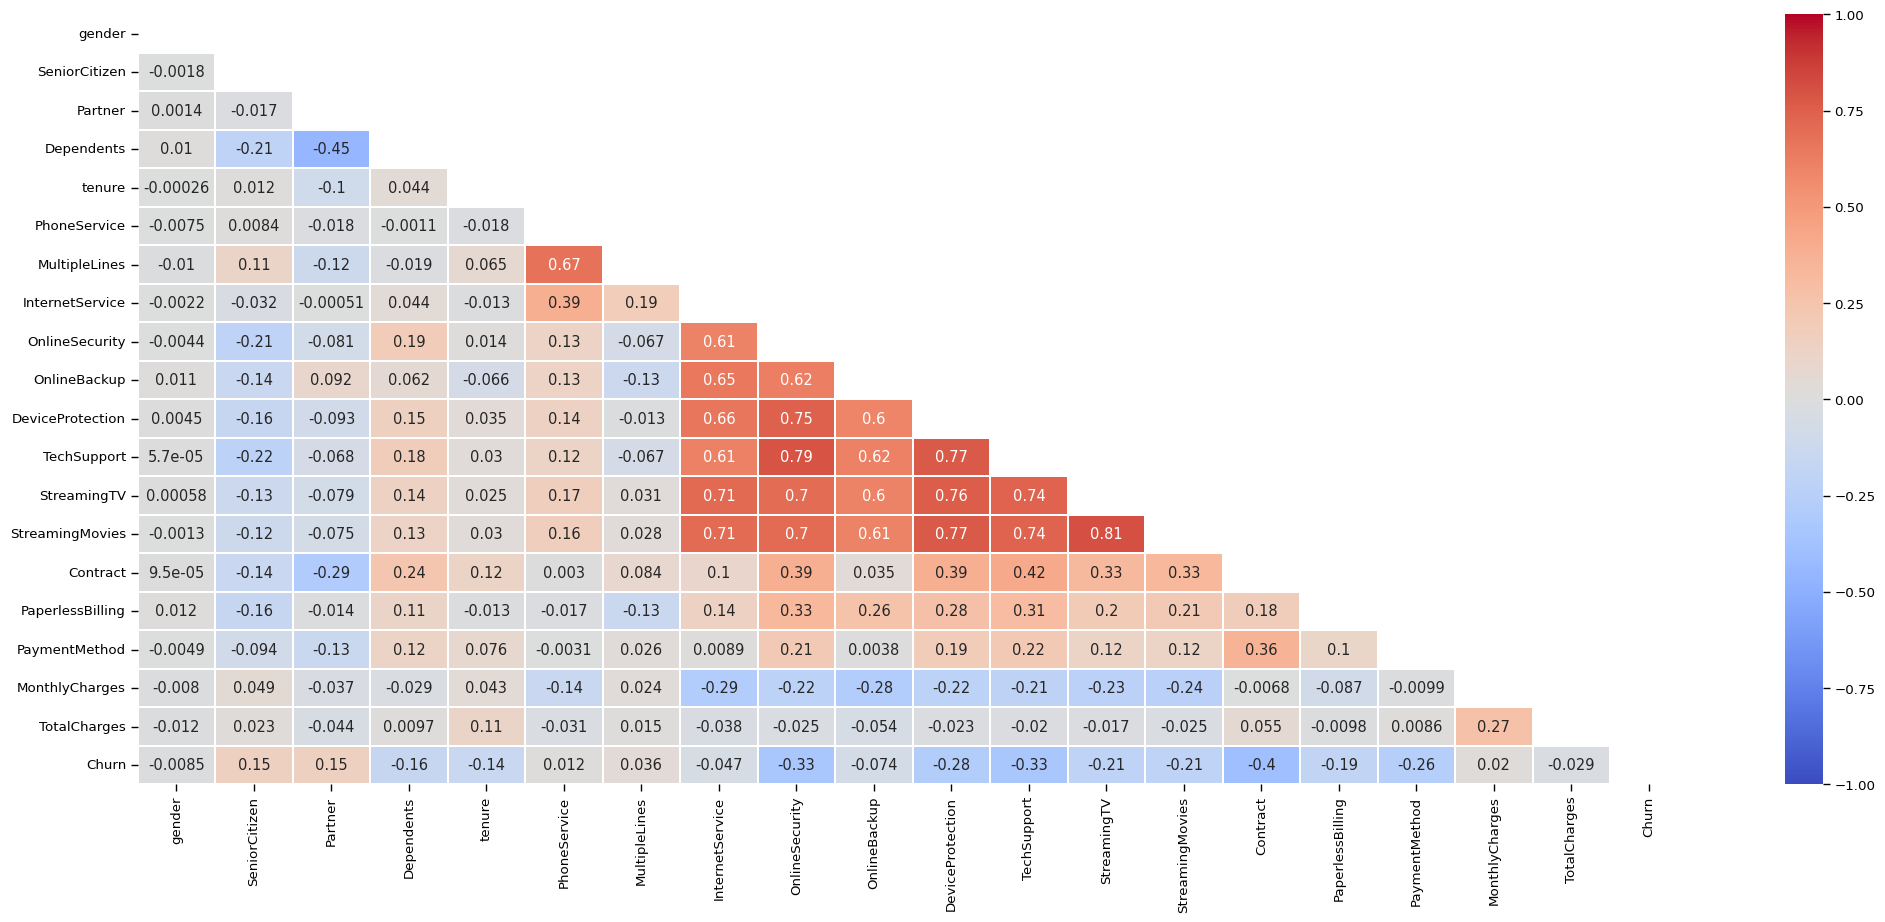

In [55]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### Data Processing

In [56]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [57]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [58]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802


<Figure size 1400x700 with 0 Axes>

In [59]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)

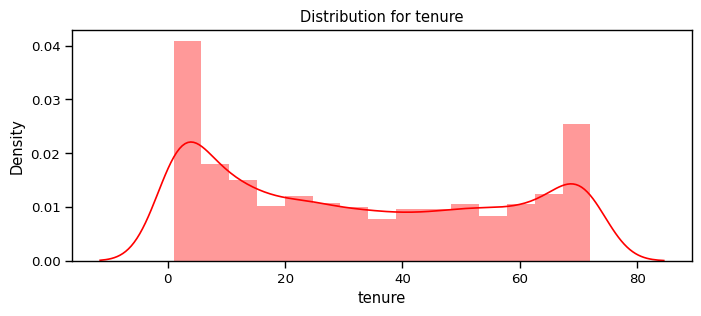

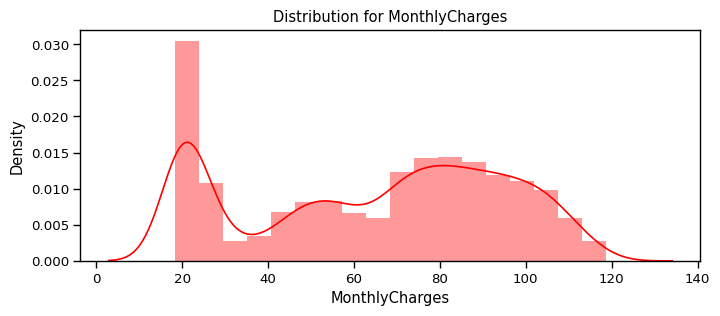

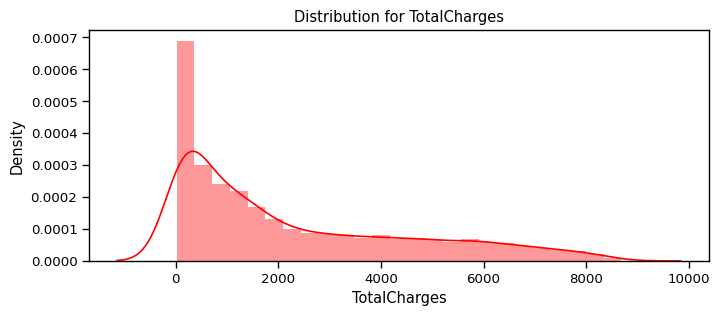

In [61]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

num_fea=["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_fea:
    distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

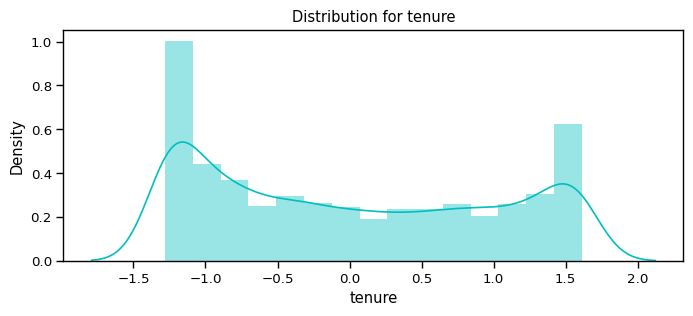

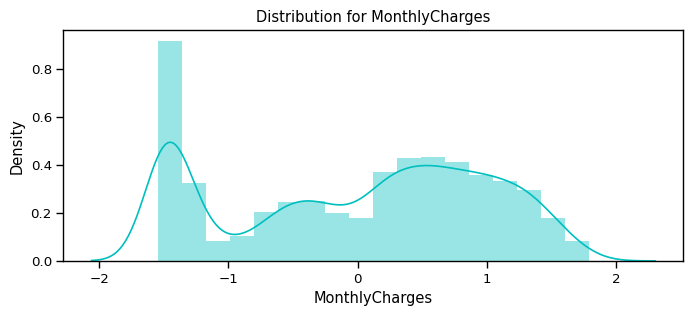

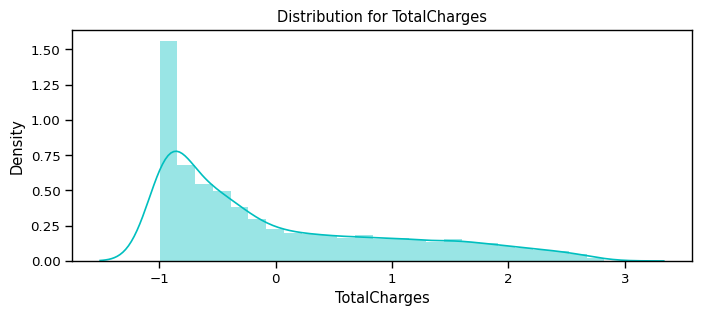

In [64]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_fea].astype('float64')),columns=num_fea)
for feat in numerical_cols:
  distplot(feat, df_std, color='c')

In [154]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [155]:
X_train.shape, X_test.shape

((4922, 19), (2110, 19))

### model Evaluations

## Logistic Regression

In [156]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print("Accuracy: ", accuracy_lr)

Accuracy:  0.79478672985782


In [157]:
lr_pred = lr_model.predict(X_test)
report= classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1557
           1       0.62      0.55      0.58       553

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



Key takeaways:

✅ The model is doing a good job identifying customers who stay (class 0) with high recall (0.82).

✅ But it struggles to correctly identify customers who churn (class 1), with recall only 0.64. That means it is missing more than half of the churners.

✅ The F1-score for churners (0.54) is low, showing room for improvement.

“The model is currently good at finding people who are likely to stay, but it misses too many people who might leave. We will improve it by balancing the training data, so it can better catch employees who are at risk of leaving.”

In [158]:
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print("Accuracy: ", accuracy_lr)
lr_pred = lr_model.predict(X_test)
report= classification_report(y_test, lr_pred)
print(report)

Accuracy:  0.7241706161137441
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1557
           1       0.48      0.80      0.60       553

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.72      0.74      2110



Key differences compared to before:

✅ Now the model is much better at recalling churners (class 1 recall went from 0.46 to 0.75) — this means it is catching more of the people at risk of leaving.

✅ As expected, its recall for class 0 went down (from 0.92 to 0.72), because the model is making more churn predictions, trading off some accuracy on non-churners.

✅ Overall F1-score for churn improved from 0.54 → 0.59.

✅ Accuracy dropped a bit from 0.80 → 0.73, but accuracy is not the best metric here because your classes are imbalanced — so it’s good that recall for churn improved.


“After rebalancing the data, the model is now much better at spotting employees at risk of leaving, even though it makes a few more mistakes in predicting who will stay. This helps us intervene with at-risk employees earlier.”

In [159]:
from imblearn.over_sampling import SMOTE

In [160]:
smote = SMOTE(random_state=42)
X_resampled , y_resampled = smote.fit_resample(X_train,y_train)

In [161]:
X_resampled.shape, y_resampled.shape

((7212, 19), (7212,))

In [162]:
lr_model = LogisticRegression()
lr_model.fit(X_resampled, y_resampled)
accuracy_lr = lr_model.score(X_test, y_test)
print("Accuracy: ", accuracy_lr)

Accuracy:  0.728436018957346


In [163]:
lr_pred = lr_model.predict(X_test)
report= classification_report(y_test, lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1557
           1       0.49      0.79      0.60       553

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.74      2110



“We balanced the data using a technique that creates more examples of churners, so the model could learn better. It still performs similarly, meaning logistic regression has reached its limits, and we may need a more powerful model to do better.”

In [164]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train,y_train)
pred_tes = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_tes))
print(classification_report(y_test,pred_tes))

0.7928909952606635
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1557
           1       0.64      0.47      0.54       553

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



✅ Overall accuracy stayed 80%

✅ Class 1 (churn) recall is 0.45, which is similar to what you had before

✅ Class 1 F1-score is 0.54, also similar


“This Random Forest model is good at identifying people who will stay, but still struggles to identify who might leave. Next, we’ll rebalance the training data so it learns better from churners.”

In [165]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",class_weight= "balanced",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train,y_train)
pred_tes = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_tes))
print(classification_report(y_test,pred_tes))

0.747867298578199
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1557
           1       0.51      0.79      0.62       553

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



Recall for class 1 (Churn) is 0.77, which is good — the model is catching most of the churn cases.

But precision for class 1 is low (0.50) — meaning many false positives, i.e., predicting churn when the customer didn't actually churn.

F1-score for class 1 is 0.61 — still acceptable, but could be improved.

Your class imbalance is being partially handled with class_weight='balanced'.

Text(0.5, 1.0, 'Receiver Operating Characteristic')

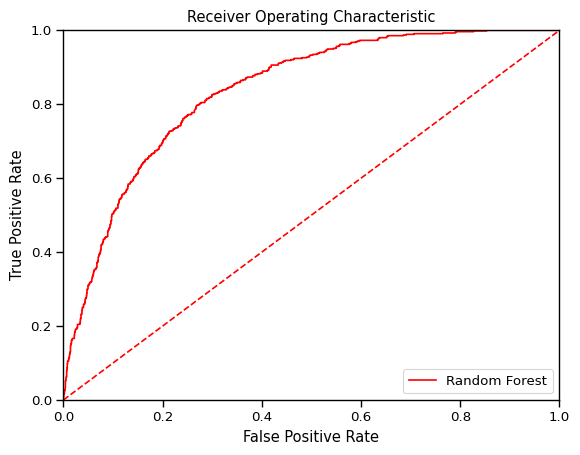

In [166]:
fpr , tpr , threshold = roc_curve(y_test ,model_rf.predict_proba(X_test)[:,1])
plt.plot(fpr , tpr , label='Random Forest',color = "r")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')

In [167]:
from sklearn.metrics import roc_auc_score

y_proba = model_rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.3f}")

AUC: 0.836


 It means the model has an 83% chance of correctly ranking a randomly chosen churner higher than a randomly chosen non-churner.

“The model scores 83% in its ability to tell apart people who stay versus people who leave. That’s a strong indicator that we can rely on it to help us spot employees who might quit, so we can proactively reach out to them.”

In [168]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
pred_tes = dt_model.predict(X_test)
print(metrics.accuracy_score(y_test,pred_tes))

0.7137440758293839


In [169]:
print(classification_report(y_test, pred_tes))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1557
           1       0.46      0.51      0.48       553

    accuracy                           0.71      2110
   macro avg       0.64      0.65      0.64      2110
weighted avg       0.72      0.71      0.72      2110



Decision Trees are prone to overfitting on the training data if not tuned properly.

Without class_weight or resampling, it is still biased toward the majority class.

In [170]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train,y_train)
pred_tes = dt_model.predict(X_test)
print(metrics.accuracy_score(y_test,pred_tes))

0.7199052132701422


In [171]:
print(classification_report(y_test, pred_tes))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1557
           1       0.47      0.52      0.49       553

    accuracy                           0.72      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.72      0.72      2110



“A single decision tree can somewhat find churners, but it’s less accurate than the Random Forest model. It does not handle the complexity of the data as well.”

In [176]:
# assuming your final balanced Random Forest is model_rf
importances = model_rf.feature_importances_
print(importances)
# assuming your feature names are in X_train.columns
feature_names = X.columns



[0.00186036 0.00308023 0.00258558 0.00667501 0.15718715 0.00255556
 0.00674337 0.0676734  0.10597119 0.04368461 0.02377229 0.08844489
 0.00707608 0.00781255 0.26243566 0.01520049 0.02556285 0.08323729
 0.08844146]


In [177]:

# sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

for idx in indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Contract: 0.2624
tenure: 0.1572
OnlineSecurity: 0.1060
TechSupport: 0.0884
TotalCharges: 0.0884
MonthlyCharges: 0.0832
InternetService: 0.0677
OnlineBackup: 0.0437
PaymentMethod: 0.0256
DeviceProtection: 0.0238
PaperlessBilling: 0.0152
StreamingMovies: 0.0078
StreamingTV: 0.0071
MultipleLines: 0.0067
Dependents: 0.0067
SeniorCitizen: 0.0031
Partner: 0.0026
PhoneService: 0.0026
gender: 0.0019


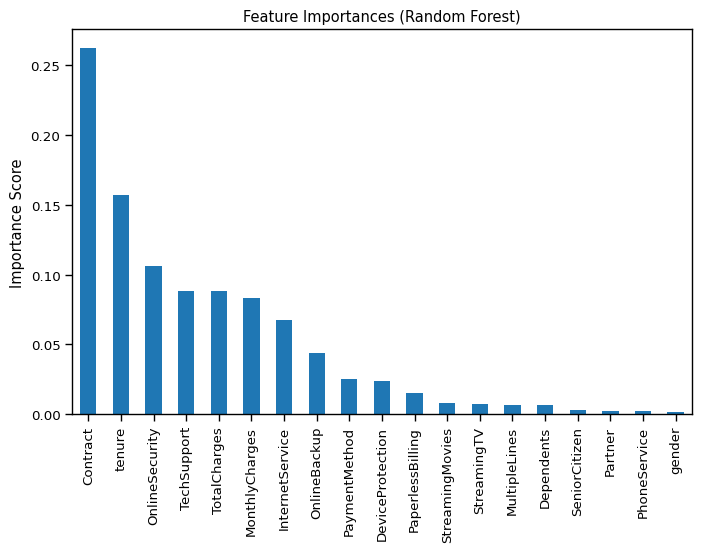

In [182]:
import pandas as pd

# plot
plt.figure(figsize=(8,5))
# Convert the zipped object to a pandas Series for plotting
feature_importances_series = pd.Series(importances, index=feature_names)
feature_importances_series.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

RandomizedSearchCV

In [183]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='roc_auc',
    cv=5,
    n_iter=30,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train, y_train)
best_model = search.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [184]:
# Best estimator
best_model = search.best_estimator_

# Best hyperparameters
print("Best Parameters:\n", search.best_params_)


Best Parameters:
 {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced_subsample'}


In [185]:

# Predictions
preds = best_model.predict(X_test)
probs = best_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, preds))
print("ROC AUC:", roc_auc_score(y_test, probs))
print(classification_report(y_test, preds))


Accuracy: 0.761611374407583
ROC AUC: 0.8365707688894928
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1557
           1       0.53      0.73      0.62       553

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.76      0.77      2110



🔹 Recall on churn class improved to 73% (very good for reducing customer loss).

🔹 Precision is still on the lower side (53%) → this means some false positives.

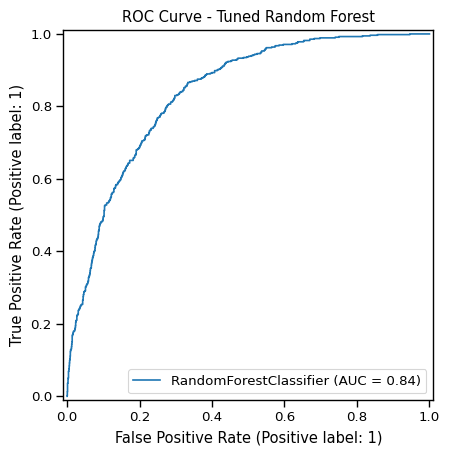

In [186]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve - Tuned Random Forest")
plt.show()


SVM

In [192]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7924170616113744


In [193]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1557
           1       0.64      0.47      0.54       553

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [206]:
knn_model = KNeighborsClassifier(n_neighbors = 19)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7682464454976303


In [207]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1557
           1       0.56      0.52      0.54       553

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110



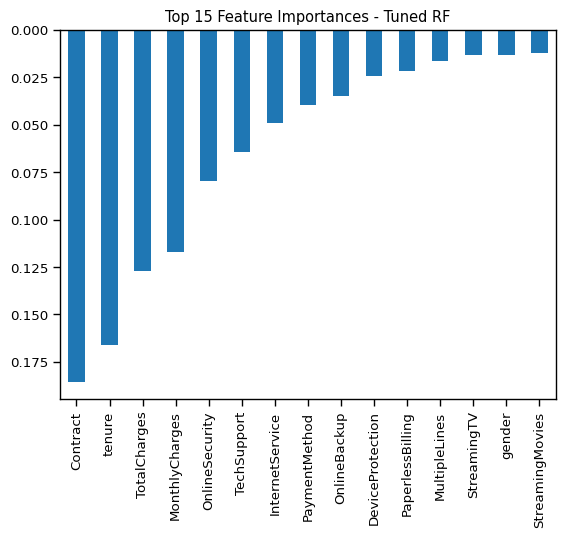

In [189]:

feature_importances_series = pd.Series(best_model.feature_importances_, index=feature_names)
feature_importances_series.sort_values(ascending=False).plot(kind='bar')
feature_importances_series.nlargest(15).plot(kind='bar')
plt.title("Top 15 Feature Importances - Tuned RF")
plt.gca().invert_yaxis()
plt.show()

Still consistent with earlier results — most impactful features:

Contract (strongest by far)

Tenure

TotalCharges

MonthlyCharges

OnlineSecurity

TechSupport

These are strong predictors and align with domain intuition (contract length, tenure, service type)


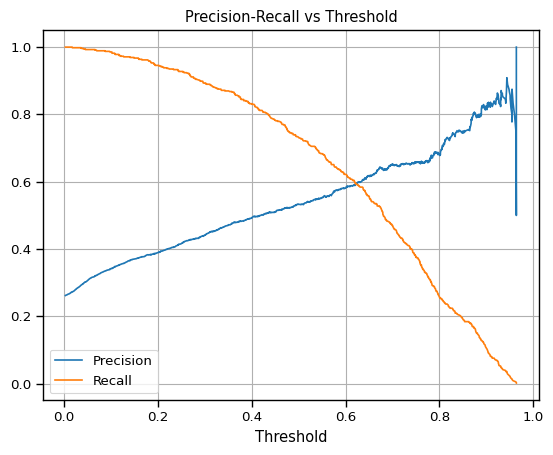

In [190]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Plot the trade-off
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid()
plt.title("Precision-Recall vs Threshold")
plt.show()


Left side (low threshold):

    High recall, low precision.

    You're capturing almost all churners, but also flagging many non-churners incorrectly.

Right side (high threshold):

    High precision, low recall.

    You're flagging fewer non-churners, but missing many actual churners.

Sweet spot (around threshold = 0.55–0.65):

    Precision ≈ Recall — likely an ideal trade-off zone.

    Based on your plot, this area seems to balance both lines well.

In [191]:
optimal_threshold = 0.60
pred_optimal = (probs >= optimal_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("ROC AUC:", roc_auc_score(y_test, probs))
print(confusion_matrix(y_test, pred_optimal))
print(classification_report(y_test, pred_optimal))

ROC AUC: 0.8365707688894928
[[1309  248]
 [ 209  344]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1557
           1       0.58      0.62      0.60       553

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.73      2110
weighted avg       0.79      0.78      0.79      2110



Business wants to reduce churn at all costs (even if it means targeting non-churners):
➤ Go for higher recall (lower threshold, e.g., 0.50–0.55)

Business wants to reduce false alerts (avoid annoying loyal customers):
➤ Go for higher precision (higher threshold, e.g., 0.65–0.70)

| Criteria                       | Value / Outcome                                                                     |
| ------------------------------ | ----------------------------------------------------------------------------------- |
| **ROC AUC Score**              | \~0.83 (Excellent)                                                                  |
| **Recall for Churn Class (1)** | \~0.62–0.79 (High)                                                                  |
| **F1-Score for Churn**         | \~0.60–0.62 (Balanced)                                                              |
| **Threshold Tuned**            | Yes (0.6 found optimal)                                                             |
| **Precision for Churn**        | Improved with thresholding (up to 0.58)                                             |
| **Top Predictive Features**    | `Contract`, `Tenure`, `Charges`, `OnlineSecurity`, `TechSupport` — business-aligned |
| **Interpretability**           | Easy (via feature importance)                                                       |
| **Scalability / Speed**        | Good (especially after tuning `max_leaf_nodes`, etc.)                               |


Customer churn hurts profitability; best prevention involves knowing at-risk customers and improving their experience.

My  model:

*  Identifies churners early with high recall.

*  Maintains enough precision to avoid excessive false alerts.

*  Can be easily explained to stakeholders and operationalized for targeting campaigns or retention strategies.

In [208]:
import joblib
joblib.dump(model_rf, "rf_churn_model.pkl")
joblib.dump(optimal_threshold, "threshold.pkl")

['threshold.pkl']